<a href="https://colab.research.google.com/github/juHa1205/NLP_2023/blob/main/%5B10%EC%9B%9417%EC%9D%BC_2%5DSVM_iris_%ED%95%99%EC%83%9D%EB%AC%B8%EC%A0%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
iris= load_iris()

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 문제 0

In [9]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# 문제 1

In [11]:
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# 문제 2

In [13]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# 문제 3 seaborn 사용

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

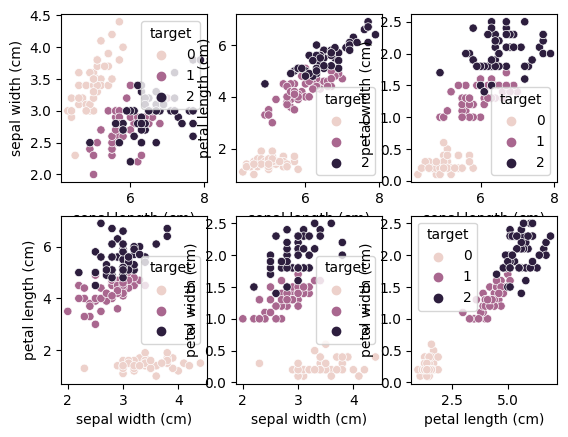

In [14]:
plt.subplot(2,3,1)
sns.scatterplot(data=df,x='sepal length (cm)', y = 'sepal width (cm)',hue = 'target')
plt.subplot(2,3,2)
sns.scatterplot(data=df,x='sepal length (cm)', y = 'petal length (cm)',hue = 'target')
plt.subplot(2,3,3)
sns.scatterplot(data=df,x='sepal length (cm)', y = 'petal width (cm)',hue = 'target')
plt.subplot(2,3,4)
sns.scatterplot(data=df,x='sepal width (cm)', y = 'petal length (cm)',hue = 'target')
plt.subplot(2,3,5)
sns.scatterplot(data=df,x='sepal width (cm)', y = 'petal width (cm)',hue = 'target')
plt.subplot(2,3,6)
sns.scatterplot(data=df,x='petal length (cm)', y = 'petal width (cm)',hue = 'target')

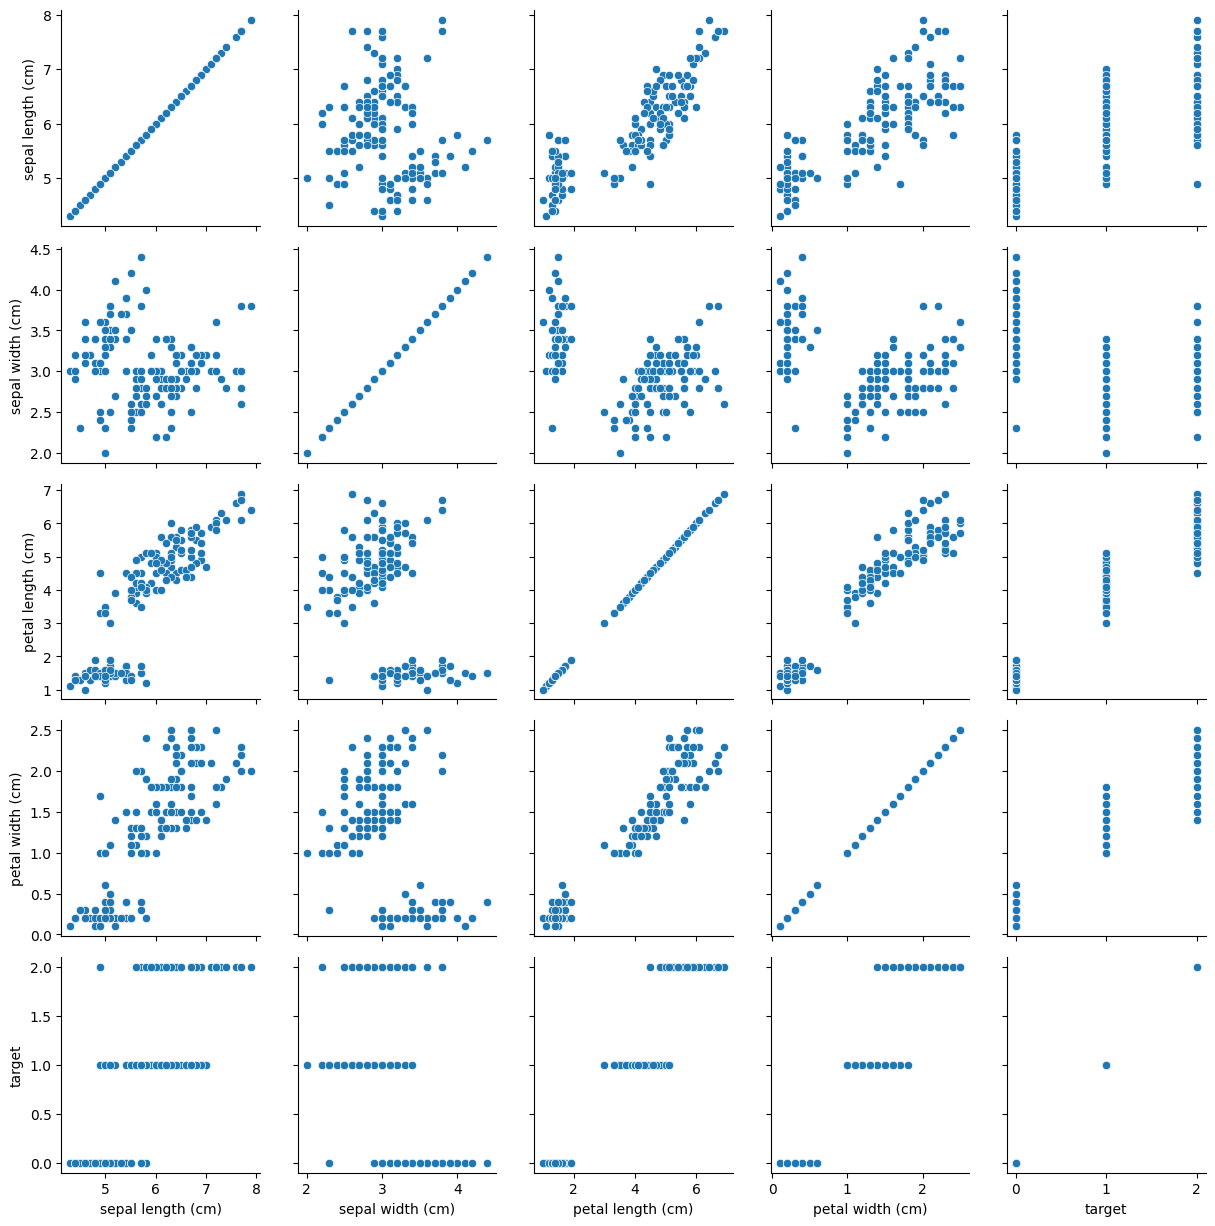

In [15]:
# 실행만 하면됨 (참고용) - 문제 아님
g = sns.PairGrid(df)
g.map(sns.scatterplot)

# 문제 4 matplot 사용

In [16]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

In [17]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'class 0(green) vs class 1 (blue)')

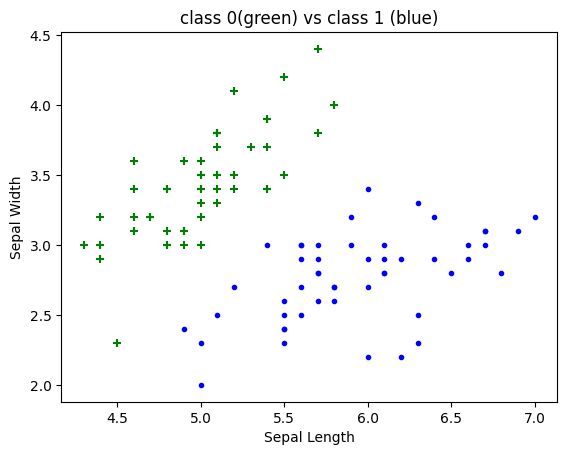

In [18]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color="blue",marker='.')
plt.title('class 0(green) vs class 1 (blue)')

Text(0.5, 1.0, 'class 0(green) vs class 2 (blue)')

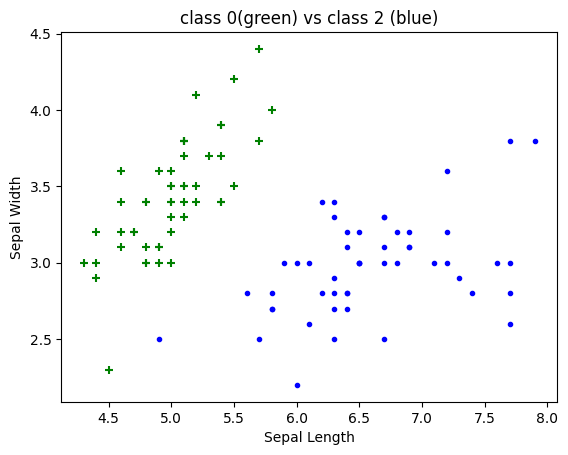

In [19]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color="blue",marker='.')
plt.title('class 0(green) vs class 2 (blue)')

Text(0.5, 1.0, 'class 1(green) vs class 2 (blue)')

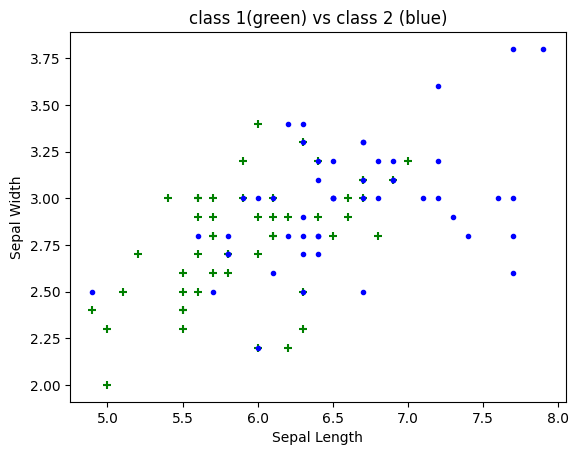

In [20]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color="green",marker='+')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color="blue",marker='.')
plt.title('class 1(green) vs class 2 (blue)')

Text(0.5, 1.0, 'class 1(green) vs class 2 (blue)')

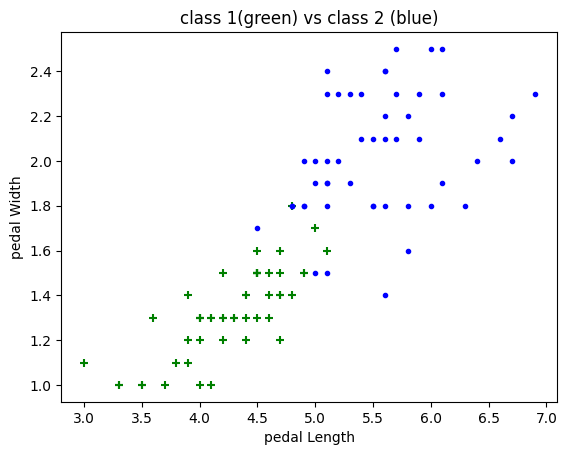

In [21]:
plt.xlabel('pedal Length')
plt.ylabel('pedal Width')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color="green",marker='+')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color="blue",marker='.')
plt.title('class 1(green) vs class 2 (blue)')

Text(0.5, 1.0, 'class 0(green) vs class 1 (blue)')

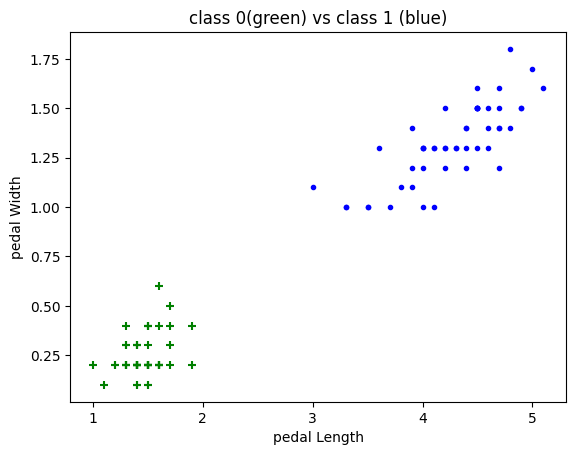

In [22]:
plt.xlabel('pedal Length')
plt.ylabel('pedal Width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color="blue",marker='.')
plt.title('class 0(green) vs class 1 (blue)')

Text(0.5, 1.0, 'class 0(green) vs class 2 (blue)')

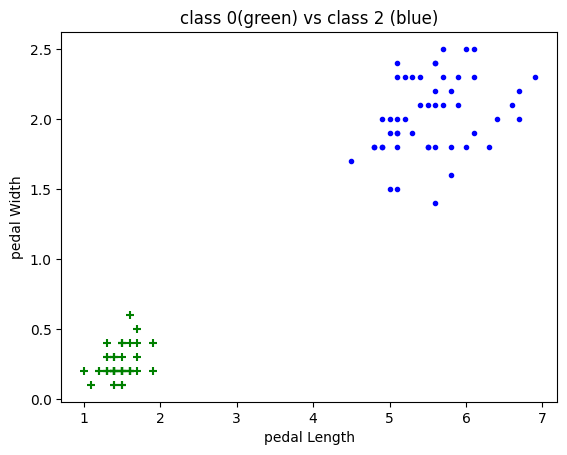

In [23]:
plt.xlabel('pedal Length')
plt.ylabel('pedal Width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color="blue",marker='.')
plt.title('class 0(green) vs class 2 (blue)')


# SVM 결과를 grid_search CV 모든 feature column 사용

# 문제 5

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = iris.data
y =iris.target
X.shape, y.shape

((150, 4), (150,))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42, stratify = y)

In [27]:
print(X_test.shape)
print(y_test.shape)

(30, 4)
(30,)




```
# 코드로 형식 지정됨

```
# 코드로 형식 지정됨
```


```

# 문제 6

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix  # 책 14쪽 ~ 23쪽 혼동행렬 보는 방법
from sklearn.metrics import ConfusionMatrixDisplay

In [31]:

param_grid = {'C': [.1,1,10,100],
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf','poly','linear']}

In [32]:
grid = GridSearchCV(SVC(),param_grid,cv=5,verbose=1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=1)

In [33]:
print(grid.best_estimator_)

SVC(C=0.1, gamma=1, kernel='linear')


In [35]:
print('학습용 데이타로 측정한 정확도는 = %.2f' %grid.score(X_train,y_train))
print('시험용 데이타로 측정한 정확도는 = %.2f' %grid.score(X_test,y_test))

학습용 데이타로 측정한 정확도는 = 0.97
시험용 데이타로 측정한 정확도는 = 0.97


In [36]:
grid_predictions = grid.predict(X_test)
grid.score(X_test,y_test)

0.9666666666666667

In [37]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# 문제 7  실행만 하면됨

<function matplotlib.pyplot.show(close=None, block=None)>

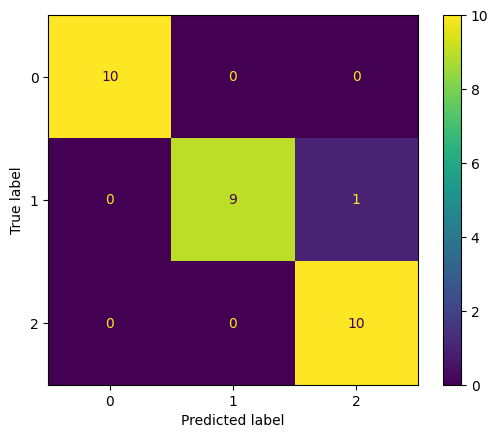

In [38]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)
plt.show

# 문제 8

# 아래 2개의 columns으로 해보기

# 'petal length (cm)','petal width (cm)'

In [40]:
df_2 = df[['petal length (cm)','petal width (cm)','target']]
df_2

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [41]:
df_2_X = df_2.drop(['target'],axis=1)
y_2=df_2['target']

In [42]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_2_X,y_2,test_size = 0.2,random_state = 42, stratify = y)

In [43]:
X_train_2

,petal length (cm),petal width (cm)
8,1.4,0.2
106,4.5,1.7
76,4.8,1.4
9,1.5,0.1
89,4.0,1.3
...,...,...
37,1.4,0.1
2,1.3,0.2
33,1.4,0.2
52,4.9,1.5


In [44]:
param_grid = {'C': [.1,1,10,100],
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf','poly','linear']}

In [45]:
grid_2 = GridSearchCV(SVC(),param_grid,cv=5,verbose=1)
grid_2.fit(X_train_2,y_train_2)
print(grid_2.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [47]:
print('학습용 데이타로 측정한 정확도는 = %.2f' %grid_2.score(X_train_2,y_train_2))
print('시험용 데이타로 측정한 정확도는 = %.2f' %grid_2.score(X_test_2,y_test_2))

학습용 데이타로 측정한 정확도는 = 0.97
시험용 데이타로 측정한 정확도는 = 0.93


<function matplotlib.pyplot.show(close=None, block=None)>

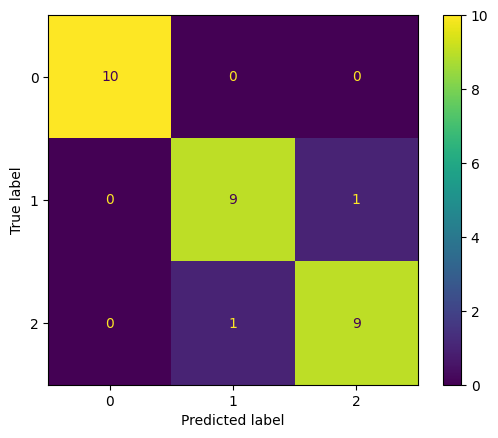

In [49]:
ConfusionMatrixDisplay.from_estimator(grid_2, X_test_2, y_test_2)
plt.show